In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
from citipy import citipy
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
#Import the time library and datetime module from the datetime library
import time 
from datetime import datetime
#Import the requests library
import requests
#import API Key
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1
#Loop through all the cities in the list 
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes. 
    if (i%50==0 and i>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #Creat endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | wairoa
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bayan
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | mounana
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kargapolye
City not found. Skipping...
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | yeppoon
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | gien
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1

Processing Record 40 of Set 4 | zhangye
Processing Record 41 of Set 4 | diego de almagro
Processing Record 42 of Set 4 | neiafu
Processing Record 43 of Set 4 | itacarambi
Processing Record 44 of Set 4 | umm kaddadah
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | indi
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | goderich
Processing Record 50 of Set 4 | shu
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | changde
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | paracuru
Processing Record 6 of Set 5 | sao joao da ponte
Processing Record 7 of Set 5 | moose factory
Processing Record 8 of Set 5 | oktyabrskiy
Processing Record 9 of Set 5 | navalmoral de la mata
Processing Record 10 of Set 5 | saint-francois
Processing Record 11 of Set 5 | lu

Processing Record 28 of Set 8 | hofn
Processing Record 29 of Set 8 | kilmallock
Processing Record 30 of Set 8 | mocuba
Processing Record 31 of Set 8 | san carlos de bariloche
Processing Record 32 of Set 8 | morros
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | shimoda
Processing Record 36 of Set 8 | karratha
Processing Record 37 of Set 8 | victoria
Processing Record 38 of Set 8 | saint andrews
Processing Record 39 of Set 8 | mwinilunga
Processing Record 40 of Set 8 | viedma
Processing Record 41 of Set 8 | puri
Processing Record 42 of Set 8 | toktogul
Processing Record 43 of Set 8 | namikupa
Processing Record 44 of Set 8 | dudinka
Processing Record 45 of Set 8 | labuhan
Processing Record 46 of Set 8 | onda
Processing Record 47 of Set 8 | dzerzhinskoye
Processing Record 48 of Set 8 | okmulgee
Processing Record 49 of Set 8 | komsomolskiy
Processing Record 50 of Set 8 | colesberg
Processing Record 1 of Set 9 | sinkat
Cit

City not found. Skipping...
Processing Record 18 of Set 12 | moroto
Processing Record 19 of Set 12 | pittsburg
Processing Record 20 of Set 12 | tiznit
Processing Record 21 of Set 12 | araouane
Processing Record 22 of Set 12 | guerrero negro
Processing Record 23 of Set 12 | yerbogachen
Processing Record 24 of Set 12 | darnah
Processing Record 25 of Set 12 | beberibe
Processing Record 26 of Set 12 | khorixas
Processing Record 27 of Set 12 | yingcheng
Processing Record 28 of Set 12 | busayra
Processing Record 29 of Set 12 | ratnagiri
Processing Record 30 of Set 12 | paita
Processing Record 31 of Set 12 | benghazi
Processing Record 32 of Set 12 | bilma
Processing Record 33 of Set 12 | houma
Processing Record 34 of Set 12 | qandala
Processing Record 35 of Set 12 | avera
Processing Record 36 of Set 12 | borogontsy
Processing Record 37 of Set 12 | phulabani
Processing Record 38 of Set 12 | darapidap
Processing Record 39 of Set 12 | sola
Processing Record 40 of Set 12 | simplicio mendes
Proces

In [7]:
print(len(city_data))

579


In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,56.48,77,97,3.78,NZ,2021-11-29 19:56:26
1,Busselton,-33.6500,115.3333,57.04,72,11,8.23,AU,2021-11-29 19:55:41
2,Hermanus,-34.4187,19.2345,61.90,76,58,12.28,ZA,2021-11-29 19:56:26
3,Ushuaia,-54.8000,-68.3000,42.46,75,75,21.85,AR,2021-11-29 19:52:47
4,Wairoa,-39.0333,177.3667,71.55,71,100,1.99,NZ,2021-11-29 19:56:27
5,Tiksi,71.6872,128.8694,-22.25,100,95,6.02,RU,2021-11-29 19:56:27
6,Vaini,-21.2000,-175.2000,78.96,73,40,10.36,TO,2021-11-29 19:55:32
7,Rikitea,-23.1203,-134.9692,76.42,76,1,22.15,PF,2021-11-29 19:52:46
8,Bayan,46.0833,127.4000,14.31,96,100,2.13,CN,2021-11-29 19:56:28
9,Atuona,-9.8000,-139.0333,78.39,78,32,23.33,PF,2021-11-29 19:51:46


In [9]:
new_column_order = ['City',"Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-11-29 19:56:26,-46.1927,168.8643,56.48,77,97,3.78
1,Busselton,AU,2021-11-29 19:55:41,-33.6500,115.3333,57.04,72,11,8.23
2,Hermanus,ZA,2021-11-29 19:56:26,-34.4187,19.2345,61.90,76,58,12.28
3,Ushuaia,AR,2021-11-29 19:52:47,-54.8000,-68.3000,42.46,75,75,21.85
4,Wairoa,NZ,2021-11-29 19:56:27,-39.0333,177.3667,71.55,71,100,1.99
5,Tiksi,RU,2021-11-29 19:56:27,71.6872,128.8694,-22.25,100,95,6.02
6,Vaini,TO,2021-11-29 19:55:32,-21.2000,-175.2000,78.96,73,40,10.36
7,Rikitea,PF,2021-11-29 19:52:46,-23.1203,-134.9692,76.42,76,1,22.15
8,Bayan,CN,2021-11-29 19:56:28,46.0833,127.4000,14.31,96,100,2.13
9,Atuona,PF,2021-11-29 19:51:46,-9.8000,-139.0333,78.39,78,32,23.33


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

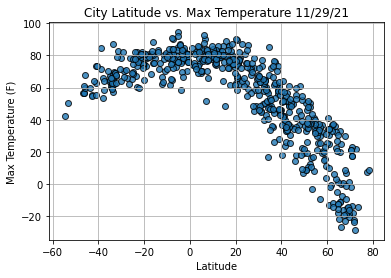

In [18]:
#Import time module 
import time 
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

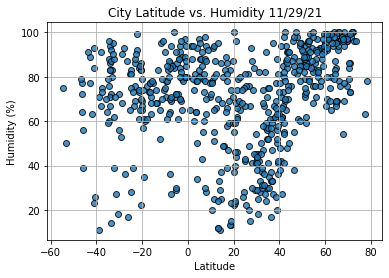

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

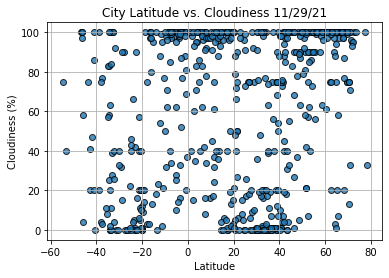

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

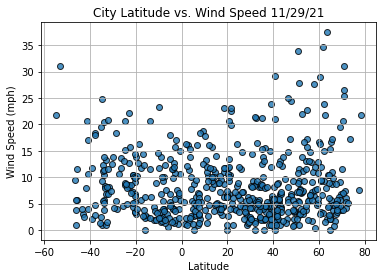

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()